# Sentiment Analysis using Vader

#### The dataset I chose is of movie reviews who have already been labelled as either having positive or negative sentiment. 

In [2]:
#First must import libraries needed to perform analysis
import numpy as np
import pandas as pd

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#creating dataframe 
df = pd.read_csv('Desktop\Test.csv')

In [3]:
#quick glance at how our data looks now
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


###### Seeing how the distribution of negative and positive sentiments initially looks like

In [4]:
df['label'].value_counts()

1    2505
0    2495
Name: label, dtype: int64

##### Here I will apply the polarity_scores function of our analyzer to our text column

In [5]:
#adding a new column that will show the performance of our analyzer on the text
df['polarity_score'] = df['text'].apply(lambda text: analyzer.polarity_scores(text))

In [6]:
df.head()

,text,label,polarity_score
0,I always wrote this series off as being a comp...,0,"{'neg': 0.039, 'neu': 0.813, 'pos': 0.148, 'co..."
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"{'neg': 0.086, 'neu': 0.836, 'pos': 0.078, 'co..."
2,This movie was so poorly written and directed ...,0,"{'neg': 0.184, 'neu': 0.685, 'pos': 0.131, 'co..."
3,The most interesting thing about Miryang (Secr...,1,"{'neg': 0.151, 'neu': 0.766, 'pos': 0.083, 'co..."
4,"when i first read about ""berlin am meer"" i did...",0,"{'neg': 0.128, 'neu': 0.762, 'pos': 0.11, 'com..."


In [7]:
#adding a new column that will only focus on the compound element
df['compound'] = df['polarity_score'].apply(lambda score: score['compound'])

In [8]:
df.head()

,text,label,polarity_score,compound
0,I always wrote this series off as being a comp...,0,"{'neg': 0.039, 'neu': 0.813, 'pos': 0.148, 'co...",0.9934
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"{'neg': 0.086, 'neu': 0.836, 'pos': 0.078, 'co...",-0.1618
2,This movie was so poorly written and directed ...,0,"{'neg': 0.184, 'neu': 0.685, 'pos': 0.131, 'co...",-0.9683
3,The most interesting thing about Miryang (Secr...,1,"{'neg': 0.151, 'neu': 0.766, 'pos': 0.083, 'co...",-0.9962
4,"when i first read about ""berlin am meer"" i did...",0,"{'neg': 0.128, 'neu': 0.762, 'pos': 0.11, 'com...",-0.6673


In [9]:
#adding a second label column that will demonstrate what label our analyzer would give these reviews
df['analyzer_label'] = df['compound'].apply(lambda compound: 'pos' if compound >= 0 else 'neg')

In [10]:
df.head()

,text,label,polarity_score,compound,analyzer_label
0,I always wrote this series off as being a comp...,0,"{'neg': 0.039, 'neu': 0.813, 'pos': 0.148, 'co...",0.9934,pos
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0,"{'neg': 0.086, 'neu': 0.836, 'pos': 0.078, 'co...",-0.1618,neg
2,This movie was so poorly written and directed ...,0,"{'neg': 0.184, 'neu': 0.685, 'pos': 0.131, 'co...",-0.9683,neg
3,The most interesting thing about Miryang (Secr...,1,"{'neg': 0.151, 'neu': 0.766, 'pos': 0.083, 'co...",-0.9962,neg
4,"when i first read about ""berlin am meer"" i did...",0,"{'neg': 0.128, 'neu': 0.762, 'pos': 0.11, 'com...",-0.6673,neg


In [11]:
#now we have obtained columns for both the initial labels as well as how our sentiment analyzer labelled them.
#let's compare the distribution now between the two
df['label'] = df['label'].replace(1, 'pos')
df['label'] = df['label'].replace(0, 'neg')
df['label'].value_counts()

pos    2505
neg    2495
Name: label, dtype: int64

In [12]:
df['analyzer_label'].value_counts()

pos    3257
neg    1743
Name: analyzer_label, dtype: int64

#### Using sklearn to analyze the performance of our analyzer on the data

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(df['label'], df['analyzer_label'])
print(cm)
accuracy_score(df['label'], df['analyzer_label'])

[[1351 1144]
 [ 392 2113]]


0.6928

### We observe that the analyzer performed with an accuracy rate of 70%. 
### Now we will analyze another dataset using an SVM classifier model to perform sentiment analysis

In [4]:
#Creating new dataframe in which we look at tweets of user complaints of airlines
df2 = pd.read_csv('Desktop\Tweets.csv')

In [15]:
df2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
df2.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [17]:
df2['airline_sentiment_gold'].value_counts()
df2['negativereason_gold'].value_counts()
df2['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[40.68994668, -73.91637642]       2
[33.75348859, -116.36209633]      2
[39.1766101, -76.6700606]         2
[37.99311597, -84.52114659]       2
[37.78618135, -122.45742542]      2
[32.82813261, -97.25115941]       2
[35.22643463, -80.93879965]       2
[40.69017276, -73.91646118]       2
[39.83426941, -104.69960636]      2
[18.22245647, -63.00369733]       2
[34.0213466, -118.45229268]       2
[37.62006843, -122.38822083]      2
[33.75539049, -116.36196163]      2
[40.68996177, -73.91640136]       2
[40.69002464, -73.91638072]       2
[25.7789761, -80.1353923]         1
[40.77265898, -73.86525922]       1
[39.91370182, -75.3405344]        1
[47.62581201, -122.3501506]       1
[33.7008468, -118.0192094]        1
[39.1765188, -76.6696894]         1
[40.46692522, -82.64567078]       1
[40.64779984, -73.78283404]       1
[33.05776114, -96.78169517] 

In [18]:
#Since airline sentiment gold, negative reason gold and tweet cord have barely any real values, we will delete them
df2 = df2.drop(columns = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'])

In [19]:
df2.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


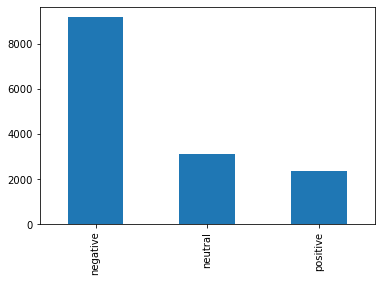

In [20]:
#now let's see how many neutral, negative and positive labels there are overall
df2['airline_sentiment'].value_counts().plot(kind = 'bar')

In [21]:
#because we are only focusing on sentiment analysis, I only want to focus on the text features
#Our X value will be the text features, and the y will be the labels of neutral, negative or positive
X = df2.iloc[:, 8]
y = df2.iloc[: , 1]

In [22]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features = 1777, stop_words = stopwords.words('english'), max_df = .7, min_df = 10 )
X = vectorizer.fit_transform(X).toarray()


In [23]:
#Now we will split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [24]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
print(y_train)

6377     negative
4597     positive
3839     positive
5518     negative
3210     negative
1534     negative
7344     negative
8271     positive
728      negative
5606     positive
6536     negative
7218      neutral
11088    positive
6116     negative
10470    negative
11689    negative
13929    negative
7115     negative
7079     negative
13024    negative
11246    negative
6210      neutral
10777    negative
841      negative
2995     positive
3948      neutral
8376     negative
779      negative
5804     positive
12784    positive
           ...   
7877     positive
4851     negative
5072     negative
2163     negative
6036     negative
6921     negative
6216      neutral
11085    negative
537      negative
9893     negative
2897     negative
7768     negative
2222      neutral
10327    negative
2599     negative
705       neutral
3468     negative
6744     negative
14116    negative
5874     positive
4373     negative
7891      neutral
9225     negative
14019    negative
4859     p

In [27]:
print(y_test)

13983    negative
14484    negative
6403     negative
9653     negative
13268    negative
2384      neutral
9613     negative
11612    negative
9252     negative
13923    negative
577       neutral
9298     negative
6236      neutral
12155    negative
6277     negative
9332     negative
578      positive
8780      neutral
4055     negative
7302     negative
5023     positive
1856      neutral
13193    negative
14012    negative
10020    negative
8124     negative
12550    negative
9571     negative
6978      neutral
3569      neutral
           ...   
9135     negative
6145     positive
6600     negative
8134     positive
8368     negative
10793     neutral
10326    negative
6139     positive
893      positive
12146    negative
13883    negative
11822    negative
4341     positive
11260    negative
2524     negative
6201     positive
10258    negative
13261    negative
7423      neutral
2923     negative
4894      neutral
11079    negative
7617     negative
11600    negative
13014    n

In [28]:
#I will be using an SVM classifier to train and predict sentiment
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', random_state = 0)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = svm.predict(X_test)
print(y_pred)

['negative' 'negative' 'negative' ... 'negative' 'positive' 'negative']


In [30]:
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
accuracy_score(y_test, y_pred)

[[2109  166   52]
 [ 327  397   48]
 [ 136   72  353]]


0.7811475409836065

### Here we saw that our SVM performed with 78% accuracy, much better than how our first model performed. 
### I would like to see if using another approach, like logistic regression, will result in a better model. 

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred2  = classifier.predict(X_test)

In [41]:
y_pred2

array(['negative', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [42]:
cm3 = confusion_matrix(y_test, y_pred2)
print(cm3)
accuracy_score(y_test, y_pred2)

[[2186  112   29]
 [ 383  340   49]
 [ 175   67  319]]


0.7773224043715847

### Using logistic regression we still did not beat the 78% accuracy of the SVM. I did notice that the logistic regression model did take a significantly shorter time in training.

#### I would like to attempt one more model, using the Naive Bayes approach

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_pred3 = classifier2.predict(X_test)

In [45]:
y_pred3

array(['negative', 'negative', 'positive', ..., 'negative', 'positive',
       'neutral'], dtype='<U8')

In [46]:
cm4 = confusion_matrix(y_test, y_pred3)
print(cm4)
accuracy_score(y_test, y_pred3)

[[ 726  595 1006]
 [  54  266  452]
 [  39   63  459]]


0.39644808743169396

### Clearly the Naive Bayes model performed the worst out of all we have tried, with only around 40% accuracy. 
### The model that performed best was the SVM, with 78% accuracy

## Now I will analyze my movie review dataset on sentiment analysis it using Transformers

In [5]:
from transformers import pipeline

In [7]:
nlp = pipeline('sentiment-analysis')

Downloading:   0%|          | 0.00/230 [00:00<?, ?B/s]

Couldn't reach server at 'https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-finetuned-sst-2-english-modelcard.json' to download model card file.
Creating an empty model card.


In [8]:
#testing it out
print(nlp('This is very bad'))
print(nlp('This is great!'))

[{'label': 'NEGATIVE', 'score': 0.9997898}]
[{'label': 'POSITIVE', 'score': 0.9998695}]


In [13]:
import pandas as pd
import numpy as np

In [9]:
#Let's once again download data and look at it
df = pd.read_csv('Desktop\Test.csv')

In [10]:
df.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [11]:
#I only want to look at the first 100
df = df.head(100)

In [12]:
#going to add a new column which shows how the nlp will label the movie reviews
df['nlp_label'] = df['text'].apply(lambda text: nlp(text))


In [16]:
#going to clean up the column of nlp_label so that it only shows the negative
df['nlp_label'] = df['nlp_label'].apply(lambda label: 'pos' if 'POSITIVE' in str(label) else 'neg')

In [17]:
df.head()

,text,label,nlp_label
0,I always wrote this series off as being a comp...,neg,neg
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,neg,neg
2,This movie was so poorly written and directed ...,neg,neg
3,The most interesting thing about Miryang (Secr...,pos,pos
4,"when i first read about ""berlin am meer"" i did...",neg,neg


In [15]:
#Now I will replace all the 0's and 1's in the label column to either positive or negative
df['label'] = df['label'].replace(1, 'pos')
df['label'] = df['label'].replace(0, 'neg')
df.head()

,text,label,nlp_label
0,I always wrote this series off as being a comp...,neg,"[{'label': 'NEGATIVE', 'score': 0.77544266}]"
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,neg,"[{'label': 'NEGATIVE', 'score': 0.95181304}]"
2,This movie was so poorly written and directed ...,neg,"[{'label': 'NEGATIVE', 'score': 0.99860674}]"
3,The most interesting thing about Miryang (Secr...,pos,"[{'label': 'POSITIVE', 'score': 0.99531436}]"
4,"when i first read about ""berlin am meer"" i did...",neg,"[{'label': 'NEGATIVE', 'score': 0.9989304}]"


In [18]:
#Now I will create confusion matrix to evaluate how it performed
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(df['label'], df['nlp_label'])
print(cm)
accuracy_score(df['label'], df['nlp_label'])

[[53  2]
 [ 9 36]]


0.89

## With an 89% accuracy, clearly this performed the best out of all models, even with me encountering difficulties with it in the beginning of the notebook. 